# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lesli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv(dotenv_path="C:/Users/lesli/Jupyter-Workspace/05-APIs Class 2 (18 June)/.env")
api_key = os.getenv("NEWS_API_KEY") 

In [3]:
from newsapi import NewsApiClient

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key) 

In [5]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

Bitcoin_headlines["articles"][1]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': None,
 'title': 'Bitcoin drops 1.6% to below $20000 - Reuters',
 'description': 'Bitcoin was off 1.63% at $19,920 by late afternoon in Europe on Saturday, down $330 from its previous close.',
 'url': 'https://www.reuters.com/markets/us/bitcoin-drops-16-below-20000-2022-08-27/',
 'urlToImage': 'https://www.reuters.com/resizer/AjlubzI3WawXrIpEPQYO0MzwlPY=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/W4IF6T6QZFNZLAUT4ZH3FGXT6Y.jpg',
 'publishedAt': '2022-08-27T16:04:00Z',
 'content': "Aug 27 (Reuters) - Bitcoin was off 1.63% at $19,920 by late afternoon in Europe on Saturday, down $330 from its previous close.\r\nBitcoin, the world's biggest and best-known cryptocurrency, is down 58… [+336 chars]"}

In [6]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

Ethereum_headlines["articles"][1]

{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'The Ethereum merge, explained',
 'description': 'Laura Shin, host of the crypto podcast "Unchained" joins "Nightcap\'s" Jon Sarlin to break down how the second most valuable crypto changed its core infrastructure while also slashing its energy usage.  For more, watch the full Nightcap episode here.',
 'url': 'https://www.cnn.com/videos/business/2022/09/15/nightcap-merge-ethereum-clip-orig.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/220915144622-nightcap-ethereum-merger-super-tease.jpg',
 'publishedAt': '2022-09-15T20:32:06Z',
 'content': ''}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]
Bitcoin_df.dropna(inplace=True)

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.17,0.763
1,2022-08-27,Aug 27 (Reuters) - Bitcoin was off 1.63% at $1...,0.0000,0.000,0.00,1.000
2,2022-08-19,"SINGAPORE, Aug 19 (Reuters) - Cryptocurrencies...",-0.6580,0.000,0.18,0.820
3,2022-09-13,"Sept 13 (Reuters) - For years, ether could bar...",0.2601,0.095,0.00,0.905
4,2022-09-13,By Joe TidyCyber reporter \r\nThe second bigge...,0.2040,0.052,0.00,0.948


In [8]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]
Ethereum_df.dropna(inplace=True)

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-09-15,"Ethereum has completed its much-anticipated ""M...",0.5059,0.158,0.063,0.779
1,2022-09-15,,0.0000,0.000,0.000,0.000
2,2022-09-14,"The second biggest cryptocurrency, Ethereum, i...",0.2040,0.049,0.000,0.951
3,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763
4,2022-09-13,By Joe TidyCyber reporter \r\nThe second bigge...,0.2040,0.052,0.000,0.948


In [9]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.028927,0.058880,0.053730,0.887390
std,0.425938,0.060644,0.062237,0.078851
min,-0.778300,0.000000,0.000000,0.637000
25%,-0.301550,0.000000,0.000000,0.833000
50%,0.000000,0.055500,0.036500,0.884500
75%,0.345300,0.081000,0.097000,0.948750
max,0.862500,0.236000,0.191000,1.000000


In [10]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.157063,0.069000,0.035250,0.885810
std,0.407601,0.066834,0.058626,0.120208
min,-0.875000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.822750
50%,0.202300,0.062000,0.000000,0.912500
75%,0.458800,0.109750,0.061250,0.948000
max,0.900100,0.250000,0.250000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer

lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_addon = {"u", "it'","n't","…","\`","``","char","''","'s",}
sw1 = sw.union(sw_addon)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw1, words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
Bitcoin_df['tokens'] = Bitcoin_df.text.apply(tokenizer)
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.17,0.763,"[Cryptocurrencies, often, criticized, bad, pla..."
1,2022-08-27,Aug 27 (Reuters) - Bitcoin was off 1.63% at $1...,0.0000,0.000,0.00,1.000,"[Aug, 27, Reuters, Bitcoin, 1.63, 19,920, late..."
2,2022-08-19,"SINGAPORE, Aug 19 (Reuters) - Cryptocurrencies...",-0.6580,0.000,0.18,0.820,"[SINGAPORE, Aug, 19, Reuters, Cryptocurrencies..."
3,2022-09-13,"Sept 13 (Reuters) - For years, ether could bar...",0.2601,0.095,0.00,0.905,"[Sept, 13, Reuters, year, ether, could, barely..."
4,2022-09-13,By Joe TidyCyber reporter \r\nThe second bigge...,0.2040,0.052,0.00,0.948,"[Joe, TidyCyber, reporter, second, biggest, cr..."


In [15]:
# Create a new tokens column for Ethereum
Ethereum_df['tokens'] = Ethereum_df.text.apply(tokenizer)
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-09-15,"Ethereum has completed its much-anticipated ""M...",0.5059,0.158,0.063,0.779,"[Ethereum, completed, much-anticipated, Merge,..."
1,2022-09-15,,0.0000,0.000,0.000,0.000,[]
2,2022-09-14,"The second biggest cryptocurrency, Ethereum, i...",0.2040,0.049,0.000,0.951,"[second, biggest, cryptocurrency, Ethereum, se..."
3,2022-08-18,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[Cryptocurrencies, often, criticized, bad, pla..."
4,2022-09-13,By Joe TidyCyber reporter \r\nThe second bigge...,0.2040,0.052,0.000,0.948,"[Joe, TidyCyber, reporter, second, biggest, cr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = ngrams(tokenizer(Bitcoin_df.text.str.cat()), n=2)
Counter(bigram_counts).most_common(20)

[(('char', 'US'), 14),
 (('US', 'stock'), 14),
 (('Federal', 'Reserve'), 11),
 (('char', 'Sept'), 5),
 (('El', 'Salvador'), 5),
 (('rate', 'hike'), 4),
 (('char', 'Ethereum'), 4),
 (('Jerome', 'Powell'), 4),
 (('stock', 'opened'), 4),
 (('char', 'Aug'), 3),
 (('char', 'Posted'), 3),
 (('legal', 'tender'), 3),
 (('char', 'Bitcoin'), 3),
 (('energy', 'consumption'), 3),
 (('next', 'month'), 3),
 (('central', 'bank'), 3),
 (('char', 'NEW'), 3),
 (('NEW', 'YORK'), 3),
 (('US', 'dollar'), 3),
 (('carbon', 'emission'), 3)]

In [18]:
# Generate the Ethereum N-grams where N=2
bigram_counts = ngrams(tokenizer(Ethereum_df.text.str.cat()), n=2)
Counter(bigram_counts).most_common(20)

[(('Ethereum', 'blockchain'), 10),
 (('char', 'Ethereum'), 8),
 (('software', 'upgrade'), 7),
 (('Ethereum', 'ETH'), 7),
 (('Vitalik', 'Buterin'), 6),
 (('upgrade', 'Ethereum'), 5),
 (('carbon', 'emission'), 4),
 (('crypto', 'market'), 4),
 (('co-founder', 'Vitalik'), 3),
 (('energy', 'usage'), 3),
 (('second', 'largest'), 3),
 (('largest', 'cryptocurrency'), 3),
 (('energy', 'consumption'), 3),
 (('Ethereum', 'Merge'), 3),
 (("'ll", 'see'), 3),
 (('Ethereum', 'merge'), 3),
 (('merge', 'event'), 3),
 (('happen', 'around'), 3),
 (('Ethereum', 'Foundation'), 3),
 (('long-awaited', 'Ethereum'), 3)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(Bitcoin_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 99),
 ('Reuters', 26),
 ('stock', 22),
 ('US', 18),
 ('Bitcoin', 17),
 ('market', 16),
 ('investor', 16),
 ('cryptocurrency', 15),
 ('Sept', 15),
 ('bitcoin', 14)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(Ethereum_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 98),
 ('Ethereum', 61),
 ('Merge', 22),
 ('blockchain', 19),
 ('cryptocurrency', 17),
 ('upgrade', 16),
 ('crypto', 16),
 ('year', 15),
 ('market', 15),
 ('energy', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 599.5, 199.5, -0.5)

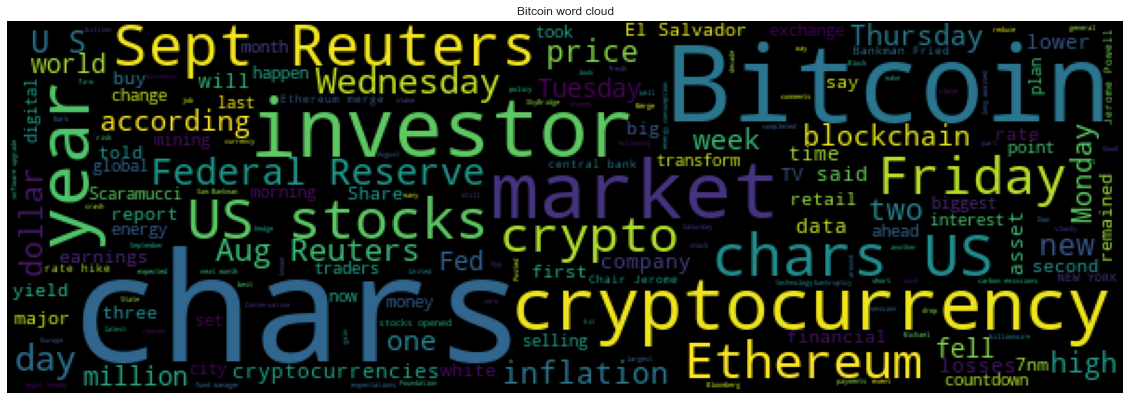

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=600).generate(Bitcoin_df.text.str.cat())
plt.imshow(wc)
plt.title("Bitcoin word cloud")
plt.axis("off")

(-0.5, 599.5, 199.5, -0.5)

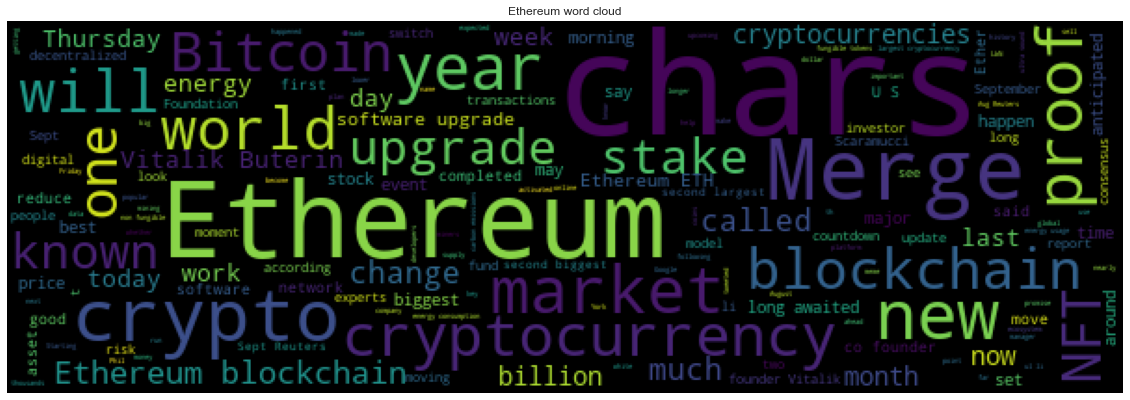

In [24]:
# Generate the Ethereum word cloud
wc = WordCloud(width=600).generate(Ethereum_df.text.str.cat())
plt.imshow(wc)
plt.title("Ethereum word cloud")
plt.axis("off")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
Btc_text = Bitcoin_df.text.str.cat()
Btc_text

'Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]Aug 27 (Reuters) - Bitcoin was off 1.63% at $19,920 by late afternoon in Europe on Saturday, down $330 from its previous close.\r\nBitcoin, the world\'s biggest and best-known cryptocurrency, is down 58… [+336 chars]SINGAPORE, Aug 19 (Reuters) - Cryptocurrencies fell sharply on Friday, with sudden selling dragging bitcoin to a three-week low.\r\nThe reason for the drop was not immediately clear. Bitcoin fell as mu… [+312 chars]Sept 13 (Reuters) - For years, ether could barely dream of challenging its big brother bitcoin. Now, its ambitions may be becoming more realistic.\r\nThe second-biggest cryptocurrency is taking market … [+3625 chars]By Joe TidyCyber reporter \r\nThe second biggest cryptocurrency, Ethereum, is about to switch over to a new operating model that uses 99.9

In [29]:
# Run the NER processor on all of the text
doc_Btc = nlp(Btc_text) 
# Add a title to the document
doc_Btc.user_data["title"] = "Bitcoin NER"


In [30]:
# Render the visualization
displacy.render(doc_Btc, jupyter=True, style="ent")

In [32]:
# List all Entities
entities = [(ent.text, ent.label_) for ent in doc_Btc.ents]
print(entities)

[('Every year', 'DATE'), ('Belgium', 'GPE'), ('the University of Cambridges Bitcoin Electricity Consump', 'ORG'), ('27', 'CARDINAL'), ('Reuters', 'ORG'), ('1.63%', 'PERCENT'), ('19,920', 'MONEY'), ('late afternoon', 'TIME'), ('Europe', 'LOC'), ('Saturday', 'DATE'), ('330', 'MONEY'), ('58', 'CARDINAL'), ('Aug 19', 'DATE'), ('Reuters', 'ORG'), ('Friday', 'DATE'), ('three-week', 'DATE'), ('13', 'CARDINAL'), ('Reuters', 'ORG'), ('years', 'DATE'), ('second', 'ORDINAL'), ('Joe TidyCyber', 'PERSON'), ('second', 'ORDINAL'), ('Ethereum', 'ORG'), ('99.9%', 'PERCENT'), ('A year', 'DATE'), ('El Salvador', 'GPE'), ('first', 'ORDINAL'), ('Angela Johnston', 'PERSON'), ('Sept 9', 'DATE'), ('Reuters', 'ORG'), ('20,000', 'MONEY'), ('six weeks', 'DATE'), ('Friday', 'DATE'), ('U.S.', 'GPE'), ('20,000', 'MONEY'), ('Central African Republics', 'ORG'), ('week', 'DATE'), ('El Salvador', 'GPE'), ('Sept 7', 'DATE'), ('Reuters', 'ORG'), ('El Salvador', 'GPE'), ('first', 'ORDINAL'), ('30', 'CARDINAL'), ('Reuters'

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
ETH_text = Ethereum_df.text.str.cat()
ETH_text

'Ethereum has completed its much-anticipated "Merge" to a far more energy efficient method of minting new coins, the cryptocurrency\'s co-founder Vitalik Buterin tweeted. Ether coins will no longer be … [+2125 chars]The second biggest cryptocurrency, Ethereum, is set to switch over to a new operating model that it says uses 99.9% less energy.\r\nCalled The Merge, the change has been planned for eight years, and is… [+78 chars]Cryptocurrencies are often criticized for being bad for the planet. Every year, bitcoin mining consumes more energy than Belgium, according to the University of Cambridges Bitcoin Electricity Consump… [+3829 chars]By Joe TidyCyber reporter \r\nThe second biggest cryptocurrency, Ethereum, is about to switch over to a new operating model that uses 99.9% less energy.\r\nThe change, called The Merge, is designed to wi… [+5489 chars]Sept 15 (Reuters) - A major software upgrade to the Ethereum blockchain aimed at drastically reducing its energy usage has been completed,

In [35]:
# Run the NER processor on all of the text
doc_ETH = nlp(ETH_text) 
# Add a title to the document
doc_ETH.user_data["title"] = "Ethereum NER"


In [36]:
# Render the visualization
displacy.render(doc_ETH, jupyter=True, style="ent")

In [37]:
# List all Entities
entities = [(ent.text, ent.label_) for ent in doc_ETH.ents]
print(entities)

[('Ethereum', 'ORG'), ('Merge', 'WORK_OF_ART'), ('Vitalik Buterin', 'PERSON'), ('second', 'ORDINAL'), ('Ethereum', 'ORG'), ('99.9%', 'PERCENT'), ('eight years', 'DATE'), ('Every year', 'DATE'), ('Belgium', 'GPE'), ('the University of Cambridges Bitcoin Electricity Consump', 'ORG'), ('Joe TidyCyber', 'PERSON'), ('second', 'ORDINAL'), ('Ethereum', 'ORG'), ('99.9%', 'PERCENT'), ('15', 'CARDINAL'), ('Reuters', 'ORG'), ('Ethereum', 'ORG'), ('Vitalik Buterin', 'PERSON'), ('Ethereum', 'ORG'), ('Ethereum', 'ORG'), ('Thursday', 'DATE'), ('Julian Satterthwaite', 'PERSON'), ('LG', 'ORG'), ('South Korean', 'NORP'), ('today', 'DATE'), ('+1485', 'NORP'), ('second', 'ORDINAL'), ('more than 99%', 'PERCENT'), ('chars]LONDON', 'ORG'), ('Sept 12', 'DATE'), ('Reuters', 'ORG'), ('Ethereum', 'ORG'), ('this week', 'DATE'), ('two', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('zero', 'CARDINAL'), ('six hours', 'TIME'), ("+11176 chars]Ethereum's", 'PERSON'), ('Wednesday', 'DATE'), ('Thursday', 'DATE

---